<a href="https://colab.research.google.com/github/LatiefDataVisionary/data-analysis-dicoding-projects/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Lathif Ramadhan
- **Email:** lathiframadhan18@gmail.com
- **ID Dicoding:** latief18

## 3 Dataset yang Dipilih dari E-Commerce Public Dataset

Dalam analisis ini, saya menggunakan tiga dataset yakni:

**1. Orders**
- Memuat informasi pesanan, termasuk status, tanggal pembelian, dan tanggal pengiriman.

**2. Order Items**
- Menyediakan detail item dalam pesanan, seperti harga, biaya pengiriman, dan informasi tentang produk.

**3. Customers**
- Berisi informasi pelanggan, termasuk ID unik pelanggan, lokasi (kode pos, kota, dan negara bagian).

Ketiga dataset ini dipilih karena mereka mencakup data inti yang diperlukan untuk menjawab pertanyaan dan mencapai insight yang diinginkan, seperti pola pembelian, estimasi waktu pengiriman, dan analisis pelanggan.


**Alasan hanya menggunakan 3 dataset:**

**1. Relevansi Terhadap Pertanyaan**
  - Dataset ini sudah mencakup data paling relevan untuk mengeksplorasi faktor-faktor yang mempengaruhi total pembelian, pola pembelian, waktu pengiriman, dan perilaku pelanggan.

**2. Keterkaitan yang Saling Mendukung**
  - Ketiga dataset ini memiliki hubungan yang kuat, di mana:

      - **Orders** memberikan informasi tentang waktu pembelian dan status pesanan.
      - **Order Items** mendetailkan produk yang dibeli dan biayanya, sehingga mendukung perhitungan nilai total pembelian.
      - **Customers** memungkinkan kita menganalisis data demografis pelanggan untuk memahami faktor lokasi atau loyalitas.

**3. Menghindari Kerumitan Berlebihan**
  - Memakai terlalu banyak dataset dapat menambah kompleksitas dan waktu pemrosesan yang mungkin tidak diperlukan jika insight bisa dicapai dengan dataset utama ini.

## Menentukan Pertanyaan Bisnis

**- Pertanyaan 1**

Apa faktor yang paling memengaruhi nilai total pembelian pelanggan di platform e-commerce ini?

- Insight yang ingin dicapai: Menganalisis bagaimana berbagai variabel (seperti jumlah item dalam keranjang, kategori produk, atau diskon) mempengaruhi total pembelian pelanggan.

**- Pertanyaan 2**

Bagaimana pola pembelian berdasarkan waktu? Apakah ada tren musiman atau harian yang terlihat?

- Insight yang ingin dicapai: Menganalisis data pembelian untuk melihat apakah ada tren tertentu dalam waktu pembelian (misalnya, hari tertentu dalam seminggu atau bulan) dan bagaimana itu berdampak pada penjualan.

**- Pertanyaan 3**

Seberapa cepat pelanggan menerima pesanan mereka dibandingkan dengan estimasi waktu pengiriman?

* Insight yang ingin dicapai: Mengidentifikasi faktor yang mungkin memengaruhi kecepatan pengiriman, seperti lokasi pelanggan, kategori produk, atau kinerja penjual. Hal ini dapat membantu memperkirakan tingkat kepuasan pelanggan.

**- Pertanyaan 4**

Apakah terdapat pelanggan loyal dengan pola pembelian yang konsisten, dan faktor apa yang membuat mereka tetap membeli di platform ini?

* Insight yang ingin dicapai: Menentukan faktor-faktor yang menyebabkan pelanggan kembali melakukan pembelian di platform, seperti pengalaman pengguna, kualitas produk, atau layanan pelanggan. Informasi ini dapat membantu merancang strategi retensi pelanggan.

## Import Semua Packages/Library yang Digunakan

In [1]:
# Manipulasi dan analisis data
import pandas as pd
import numpy as np

# Visualisasi dasar dan lanjutan
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Opsional, untuk visualisasi interaktif

# Pengolahan data lanjutan (opsional, jika ada)
from scipy import stats

# Analisis geospasial (opsional, jika dataset memuat data lokasi)
import geopandas as gpd
import folium

# Mount Google Drive ke Colab
from google.colab import drive

# Mengimpor Library untuk Ekstraksi ZIP
import zipfile
import os

## Data Wrangling

### Gathering Data

**1. Mount Google Drive**

Karena filenya saya simpan di Google Drive, maka saya menggunakan Mount Google drive untuk dapat mengakses datasetnya menggunakan link.

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


**2. Membaca Dataset**


In [3]:
# Definisikan jalur ke masing-masing file dataset
base_path = '/content/drive/My Drive/Projek Analisis Data Menggunakan Python Dicoding/'

# Memuat datasets
orders_path = os.path.join(base_path, 'orders_dataset.csv')
order_items_path = os.path.join(base_path, 'order_items_dataset.csv')
customers_path = os.path.join(base_path, 'customers_dataset.csv')

# Membaca masing-masing dataset
orders_data = pd.read_csv(orders_path)
order_items_data = pd.read_csv(order_items_path)
customers_data = pd.read_csv(customers_path)

# Preview dari masing-masing dataset
print("Orders Data:")
print(orders_data.head())
print("\nOrder Items Data:")
print(order_items_data.head())
print("\nCustomers Data:")
print(customers_data.head())


Orders Data:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00     

### Insight Gathering Data
Deskripsi Dataset:

**1. Orders Data:**

- Jumlah baris: 99442 baris
- Jumlah kolom: 8
- Kolom yang ada: order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date.

**2. Order Items Data:**

- Jumlah baris: 112561 baris
- Jumlah kolom: 7
- Kolom yang ada: order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value.

3**. Customers Data:**

- Jumlah baris: 99442 baris
- Jumlah kolom: 5
- Kolom yang ada: customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state.


### Assessing Data

In [4]:
# Memeriksa informasi dasar dari masing-masing dataset
print("\tOrders Data Info:")
print(orders_data.info())
print("\n\n\tOrder Items Data Info:")
print(order_items_data.info())
print("\n\n\tCustomers Data Info:")
print(customers_data.info())

# Menampilkan ringkasan statistik untuk dataset numerik
print("\n\n\tOrders Data Summary:")
print(orders_data.describe())
print("\n\n\tOrder Items Data Summary:")
print(order_items_data.describe())
print("\n\n\tCustomers Data Summary:")
print(customers_data.describe())


	Orders Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


	Order Items Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  


**Insight:**
### Insight Dataset
1. **Orders Data**: Dataset berisi 99.441 pesanan dengan beberapa nilai hilang pada kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`. Mayoritas status pesanan adalah `delivered`, yang menunjukkan keberhasilan pengiriman.

2. **Order Items Data**: Dataset memiliki 112.650 item pesanan dengan harga bervariasi dari yang rendah hingga tinggi. Rata-rata harga item adalah Rp 120.653, dan ada beberapa item dengan biaya pengiriman nol. Ini bisa menunjukkan berbagai kategori produk yang ditawarkan.

3. **Customers Data**: Dataset berisi 99.441 pelanggan dengan rentang kode pos yang luas. Ini dapat memberikan wawasan tentang distribusi pelanggan dan segmen pasar yang berbeda yang perlu dianalisis lebih lanjut.


### Cleaning Data

In [6]:
## Cleaning Orders Data
  # Menghapus duplikat
orders_data.drop_duplicates(inplace=True)

  # Menangani nilai hilang
  # Mengisi nilai hilang pada 'order_approved_at' dengan tanggal terbaru dari 'order_purchase_timestamp'
orders_data['order_approved_at'].fillna(orders_data['order_purchase_timestamp'], inplace=True)

  # Menghapus entri yang memiliki nilai hilang pada kolom penting
orders_data.dropna(subset=['order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

  # Mengubah kolom menjadi tipe data datetime
orders_data['order_purchase_timestamp'] = pd.to_datetime(orders_data['order_purchase_timestamp'])
orders_data['order_approved_at'] = pd.to_datetime(orders_data['order_approved_at'])
orders_data['order_delivered_carrier_date'] = pd.to_datetime(orders_data['order_delivered_carrier_date'])
orders_data['order_delivered_customer_date'] = pd.to_datetime(orders_data['order_delivered_customer_date'])

## Cleaning Order Items Data
  # Menghapus duplikat
order_items_data.drop_duplicates(inplace=True)

  # Memeriksa nilai harga dan freight_value
order_items_data = order_items_data[order_items_data['price'] >= 0]  # Menghapus harga negatif
order_items_data = order_items_data[order_items_data['freight_value'] >= 0]  # Menghapus freight value negatif

## Cleaning Customers Data
  # Menghapus duplikat
customers_data.drop_duplicates(inplace=True)

  # Menangani nilai hilang (tidak ada yang terdeteksi, tetapi bisa ditangani jika perlu)
  # Mengubah kolom customer_zip_code_prefix menjadi tipe data string
customers_data['customer_zip_code_prefix'] = customers_data['customer_zip_code_prefix'].astype(str)

  # Setelah membersihkan data, Anda bisa melihat ringkasan data yang bersih
print("Orders Data Cleaned:")
print(orders_data.info())

print("Order Items Data Cleaned:")
print(order_items_data.info())

print("Customers Data Cleaned:")
print(customers_data.info())


<ipython-input-6-6b505097784b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_data['order_approved_at'].fillna(orders_data['order_purchase_timestamp'], inplace=True)


Orders Data Cleaned:
<class 'pandas.core.frame.DataFrame'>
Index: 96475 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96475 non-null  object        
 1   customer_id                    96475 non-null  object        
 2   order_status                   96475 non-null  object        
 3   order_purchase_timestamp       96475 non-null  datetime64[ns]
 4   order_approved_at              96475 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96475 non-null  datetime64[ns]
 6   order_delivered_customer_date  96475 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96475 non-null  object        
dtypes: datetime64[ns](4), object(4)
memory usage: 6.6+ MB
None
Order Items Data Cleaned:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   C

### Penjelasan Kode

1. **Menghapus Duplikat**: `drop_duplicates()` digunakan untuk menghapus baris yang sama.
2. **Menangani Nilai Hilang**: `fillna()` digunakan untuk mengisi nilai hilang dengan nilai lain, sedangkan `dropna()` digunakan untuk menghapus baris yang memiliki nilai hilang di kolom tertentu.
3. **Mengubah Tipe Data**: `pd.to_datetime()` digunakan untuk mengubah string ke format datetime.
4. **Memeriksa dan Menghapus Data yang Tidak Valid**: Kita memfilter dataset untuk memastikan harga dan biaya pengiriman tidak negatif.


**Insight:**
Insight dari Data yang Sudah Dibersihkan
1. Orders Data:

- Jumlah Data: Setelah pembersihan, terdapat 96.475 entri yang valid dari total 99.441 entri awal. Ini menunjukkan bahwa beberapa entri dihapus karena nilai hilang pada kolom penting, seperti tanggal pengiriman.
- Tipe Data: Kolom tanggal kini sudah dalam format datetime, yang memungkinkan analisis waktu yang lebih baik, seperti waktu pemrosesan pesanan dan estimasi pengiriman.
- Status Pesanan: Semua entri masih memiliki status pesanan, menunjukkan tidak ada entri dengan status yang hilang.
2. Order Items Data:
- Jumlah Data: Tidak ada perubahan dalam jumlah entri, tetap 112.650 entri setelah pembersihan. Ini berarti tidak ada entri yang dihapus karena nilai hilang.
- Harga dan Biaya Pengiriman: Semua entri dalam kolom harga dan biaya pengiriman adalah valid dan tidak negatif. Ini penting untuk memastikan akurasi dalam analisis biaya.
3. Customers Data:
- Konsistensi Data: Jumlah entri tetap 99.441, menunjukkan bahwa tidak ada duplikasi yang terdeteksi dan semua data konsisten.
- Kategorisasi Pelanggan: Kolom customer_zip_code_prefix sudah diubah menjadi tipe string, memudahkan analisis geografis.

## Exploratory Data Analysis (EDA)

### **1. Pertanyaan 1:** Apa faktor yang paling memengaruhi nilai total pembelian pelanggan di platform e-commerce ini?*

In [7]:
## Menghitung total nilai pembelian untuk setiap order
  # Asumsinya: total nilai pembelian dihitung berdasarkan `price` dan `freight_value` per item

  # Gabungkan dataset Orders dan Order Items berdasarkan order_id
merged_data = pd.merge(orders_data, order_items_data, on='order_id', how='inner')

  # Membuat kolom 'total_purchase_value' untuk menyimpan nilai total (harga + biaya pengiriman)
merged_data['total_purchase_value'] = merged_data['price'] + merged_data['freight_value']

## Analisis total nilai pembelian berdasarkan jumlah item per order
  # Menghitung jumlah item per order
order_items_count = merged_data.groupby('order_id').size().reset_index(name='item_count')

  # Menggabungkan jumlah item per order dengan total pembelian
purchase_analysis = pd.merge(merged_data, order_items_count, on='order_id')

  # Menampilkan statistik deskriptif untuk total pembelian
print("Statistik Deskriptif untuk Nilai Total Pembelian:")
print(purchase_analysis['total_purchase_value'].describe())

Statistik Deskriptif untuk Nilai Total Pembelian:
count    110195.000000
mean        139.924220
std         189.320441
min           6.080000
25%          55.175000
50%          92.120000
75%         157.460000
max        6929.310000
Name: total_purchase_value, dtype: float64


Hasil dari statistik deskriptif untuk nilai total pembelian menunjukkan berbagai informasi penting tentang distribusi nilai total pembelian pelanggan di platform e-commerce. Berikut penjelasannya:

1. `count`: Terdapat 110.195 entri (data) yang dihitung dalam analisis ini, yang menunjukkan jumlah total transaksi yang dipertimbangkan.

2. `mean`: Rata-rata nilai total pembelian per transaksi adalah sekitar 139.92 dollar. Ini berarti, secara rata-rata, pelanggan menghabiskan sekitar 140 dollar untuk setiap transaksi mereka, termasuk harga barang dan biaya pengiriman.

3. `std` **(Standar Deviasi)**: Nilai 189.32 menunjukkan seberapa besar variasi nilai total pembelian dari rata-rata. Angka ini cukup besar, yang mengindikasikan bahwa ada transaksi dengan pembelian yang jauh lebih tinggi atau lebih rendah dari rata-rata.

4. `min`: Nilai pembelian terkecil adalah 6.08 dollar, yang mungkin merujuk pada transaksi dengan sedikit item atau diskon yang diberikan.

5. `25%` **(Kuartil Pertama)**: 25% dari transaksi memiliki nilai total pembelian kurang dari 55.18 dollar. Ini menunjukkan bahwa sebagian besar transaksi berada pada kisaran yang lebih rendah.

6. `50%` **(Median)**: Nilai median adalah 92.12 dollar, yang menunjukkan bahwa 50% transaksi berada di bawah angka ini, dan 50% sisanya berada di atasnya.

7. `75%` **(Kuartil Ketiga)**: 75% dari transaksi memiliki nilai total pembelian kurang dari 157.46 dollar, menunjukkan bahwa transaksi dengan nilai lebih tinggi masih cukup banyak.

8. `max`: Nilai pembelian tertinggi adalah 6929.31 dollar, yang menunjukkan bahwa ada transaksi yang sangat besar, mungkin terkait dengan pembelian dalam jumlah besar atau barang premium.

Sebagai kesimpulannya, secara keseluruhan distribusi nilai total pembelian ini sangat bervariasi, dengan banyak transaksi yang memiliki nilai lebih rendah (di bawah rata-rata), namun ada juga sejumlah transaksi yang jauh lebih tinggi (outliers).







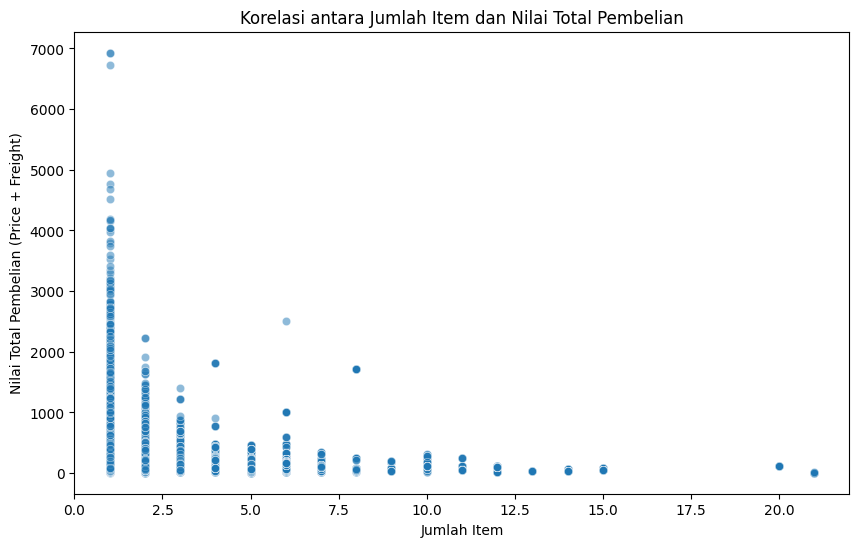

In [8]:
# Scatter plot untuk melihat pola antara jumlah item dan nilai total pembelian
plt.figure(figsize=(10, 6))
sns.scatterplot(data=purchase_analysis, x='item_count', y='total_purchase_value', alpha=0.5)
plt.title("Korelasi antara Jumlah Item dan Nilai Total Pembelian")
plt.xlabel("Jumlah Item")
plt.ylabel("Nilai Total Pembelian (Price + Freight)")
plt.show()

Grafik Scatter Plot diatas dengan tingkat signifikansi standar yaitu 5%, menunjukkan bahwa jumlah item yang paling banyak di beli adalah 1 dan 2 item. Ini mencangkup sebagian besar nilai pembelian pada keseluruhan transaksi ini. Juga terlihat bahwa, semakin banyak item yang dibeli, maka jumlah nilai jualnya juga semakin sedikit. Walau ada jeda diantara jumlah item 15 dan 20, dengan jumlah item yang terjual terbanyaknya yakni 20 ini sangat sedikit gabungan nilai pembeliannya.

In [9]:
# Menghitung korelasi untuk memverifikasi kekuatan hubungan
correlation = purchase_analysis[['item_count', 'total_purchase_value']].corr()
print("\nKorelasi antara Jumlah Item dan Nilai Total Pembelian:")
print(correlation)


Korelasi antara Jumlah Item dan Nilai Total Pembelian:
                      item_count  total_purchase_value
item_count              1.000000             -0.075089
total_purchase_value   -0.075089              1.000000


Hasil korelasi antara **Jumlah Item** dan **Nilai Total Pembelian** menunjukkan angka **-0.075089**, yang mengindikasikan hubungan **negatif yang sangat lemah** antara keduanya.

Penjelasan:
* Angka korelasi **-0.075089** menunjukkan bahwa ada sedikit kecenderungan bahwa ketika jumlah item yang dibeli meningkat, nilai total pembelian cenderung sedikit menurun, meskipun hubungan ini sangat lemah.
* Nilai korelasi yang sangat kecil dan mendekati nol mengindikasikan bahwa **jumlah item** dalam keranjang pembelian **tidak berpengaruh signifikan** terhadap **nilai** **total pembelian**.

Kesimpulan:
* Hubungan antara jumlah item yang dibeli dengan total pembelian tidak cukup kuat. Ini bisa berarti bahwa meskipun jumlah item bertambah, harga per item atau faktor lain seperti diskon atau biaya pengiriman bisa lebih berpengaruh terhadap nilai total pembelian daripada sekadar jumlah item yang dibeli.

### **2. Pertanyaan 2:** *Bagaimana pola pembelian berdasarkan waktu? Apakah ada tren musiman atau harian yang terlihat?*

In [10]:
# Mengubah kolom 'order_purchase_timestamp' menjadi datetime
orders_data['order_purchase_timestamp'] = pd.to_datetime(orders_data['order_purchase_timestamp'])

# Menambahkan kolom untuk tanggal, bulan, dan hari dalam minggu
orders_data['purchase_date'] = orders_data['order_purchase_timestamp'].dt.date
orders_data['purchase_month'] = orders_data['order_purchase_timestamp'].dt.month
orders_data['purchase_day_of_week'] = orders_data['order_purchase_timestamp'].dt.dayofweek

# Menghitung jumlah pesanan per hari
daily_orders = orders_data.groupby('purchase_date').size()
# Menghitung jumlah pesanan per bulan
monthly_orders = orders_data.groupby('purchase_month').size()
# Menghitung jumlah pesanan per hari dalam minggu
weekday_orders = orders_data.groupby('purchase_day_of_week').size()

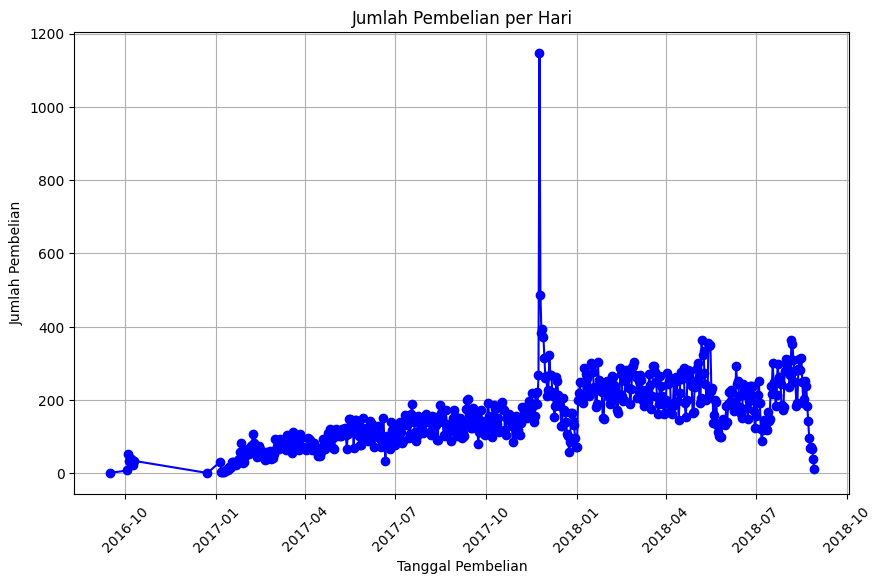

In [11]:
# Menampilkan informasi tren pembelian harian
plt.figure(figsize=(10, 6))
plt.plot(daily_orders.index, daily_orders.values, color='blue', marker='o')
plt.title('Jumlah Pembelian per Hari')
plt.xlabel('Tanggal Pembelian')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Dari grafik diatas, diperoleh insight dan penjelasan sebagai berikut:

* **Sumbu-X (Horizontal)**: Menunjukkan rentang waktu dalam bentuk tanggal, mulai dari Oktober 2016 hingga Oktober 2018.

* **Sumbu-Y (Vertikal)**: Menunjukkan jumlah pembelian yang terjadi setiap harinya. Semakin tinggi titik pada grafik, semakin banyak jumlah pembelian yang terjadi pada hari tersebut.

**Interpretasi Umum:**

Grafik diatas menyatakan bahwa terjadi fluktuasi jumlah pembelian yang terjadi dalam periode dua tahun. Kita dapat melihat bahwa jumlah pembelian cenderung bervariasi dari hari ke hari, dengan beberapa puncak dan lembah yang mencolok.

**Temuan Utama:**

* **Fluktuasi Tinggi**: Terdapat fluktuasi yang sangat tinggi dalam jumlah pembelian dari hari ke hari. Ini menunjukkan bahwa ada faktor-faktor yang sangat mempengaruhi jumlah pembelian, seperti musim, promosi, atau kejadian khusus.
* **Puncak yang Signifikan**: Terdapat satu puncak yang sangat mencolok pada sekitar Desember 2017. Ini mengindikasikan adanya peristiwa atau kampanye yang sangat sukses dalam meningkatkan jumlah penjualan pada periode tersebut.
* **Tren Umum**: Secara umum, jumlah pembelian cenderung meningkat dari awal hingga akhir 2017, kemudian terlihat stagnan hingga akhir periode tampak menurun secara drastis.

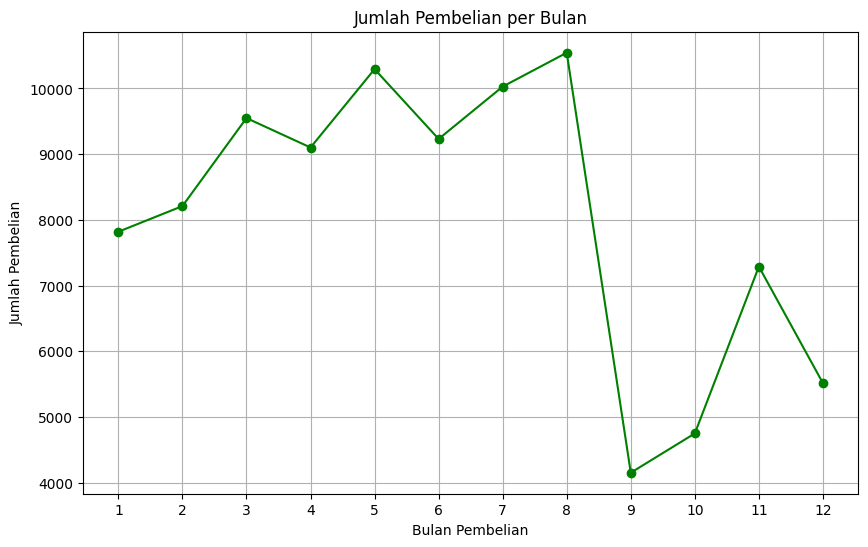

In [12]:
# Menampilkan informasi tren pembelian bulanan
plt.figure(figsize=(10, 6))
plt.plot(monthly_orders.index, monthly_orders.values, color='green', marker='o')
plt.title('Jumlah Pembelian per Bulan')
plt.xlabel('Bulan Pembelian')
plt.ylabel('Jumlah Pembelian')
plt.xticks(monthly_orders.index)
plt.grid(True)
plt.show()

Dari grafik diatas, diperoleh insight dan penjelasan sebagai berikut:

* **Sumbu-X (Horizontal)**: Menunjukkan rentang waktu dalam bentuk bulan, mulai dari bulan 1 hingga bulan 12.

* **Sumbu-Y (Vertikal)**: Menunjukkan jumlah total pembelian yang terjadi pada setiap bulan. Semakin tinggi titik pada grafik, semakin banyak jumlah pembelian yang terjadi pada bulan tersebut.

**Interpretasi Umum:**

Grafik ini menggambarkan jumlah rata-rata pembelian yang terjadi setiap bulan (Januari-Desember) namun dari bulan Oktober 2016 sampai bulan Oktober 2018. Kita dapat melihat adanya fluktuasi jumlah pembelian dari bulan ke bulan.

**Temuan Utama:**

* **Fluktuasi**: Jumlah pembelian mengalami fluktuasi yang cukup signifikan dari bulan ke bulan. Ada bulan-bulan dengan jumlah pembelian yang tinggi dan ada juga bulan-bulan dengan jumlah pembelian yang rendah.
* **Puncak Penjualan**: Terdapat beberapa puncak penjualan, yaitu pada bulan 3, 5, 7, dan 11. Ini mengindikasikan bahwa pada bulan-bulan tersebut terjadi peningkatan yang signifikan dalam jumlah pembelian.
* **Lembah Penjualan**: Sebaliknya, terdapat beberapa bulan dengan jumlah penjualan yang rendah, seperti bulan 9 dan 12. Ini menunjukkan adanya penurunan yang signifikan dalam jumlah pembelian pada bulan tersebut.

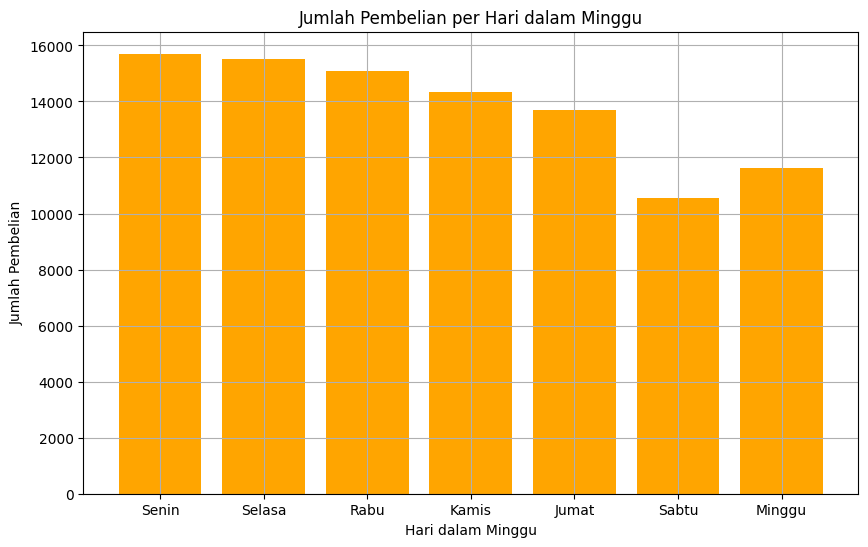

In [13]:
# Menampilkan informasi tren pembelian berdasarkan hari dalam minggu
plt.figure(figsize=(10, 6))
plt.bar(weekday_orders.index, weekday_orders.values, color='orange')
plt.title('Jumlah Pembelian per Hari dalam Minggu')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Jumlah Pembelian')
plt.xticks(weekday_orders.index, ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.grid(True)
plt.show()

Dari grafik diatas, diperoleh insight dan penjelasan sebagai berikut:

* **Sumbu-X (Horizontal)**: Menunjukkan hari-hari dalam seminggu, mulai dari Senin hingga Minggu.

* **Sumbu-Y (Vertikal)**: Menunjukkan jumlah total pembelian yang terjadi pada setiap hari. Semakin tinggi batang pada grafik, semakin banyak jumlah pembelian yang terjadi pada hari tersebut.

**Interpretasi Umum:**

Grafik diatas menggambarkan rata-rata jumlah pembelian yang terjadi setiap hari dalam satu minggu dari bulan Oktober 2016 sampai bulan Oktober 2018. Kita dapat melihat adanya perbedaan jumlah pembelian antara satu hari dengan hari lainnya.

**Temuan Utama**:

* **Hari dengan Pembelian Tertinggi**: Hari Senin, Selasa, Rabu, dan Kamis memiliki jumlah pembelian yang paling tinggi. Ini mengindikasikan bahwa pada hari-hari kerja tersebut terjadi aktivitas pembelian yang paling banyak.
* **Hari dengan Pembelian Terendah**: Hari Sabtu memiliki jumlah pembelian yang paling rendah. Ini menunjukkan bahwa pada hari Sabtu aktivitas pembelian cenderung menurun.
* **Pola Umum**: Secara umum, jumlah pembelian cenderung menurun dari hari kerja menuju akhir pekan.

### **3. Pertanyaan 3:** *Seberapa cepat pelanggan menerima pesanan mereka dibandingkan dengan estimasi waktu pengiriman?*

In [15]:
# Pastikan kolom tanggal dalam format datetime
orders_data['order_estimated_delivery_date'] = pd.to_datetime(orders_data['order_estimated_delivery_date'])
orders_data['order_delivered_customer_date'] = pd.to_datetime(orders_data['order_delivered_customer_date'])

# Hitung perbedaan hari antara tanggal pengiriman estimasi dan tanggal pengiriman aktual
orders_data['delivery_difference'] = (orders_data['order_estimated_delivery_date'] - orders_data['order_delivered_customer_date']).dt.days

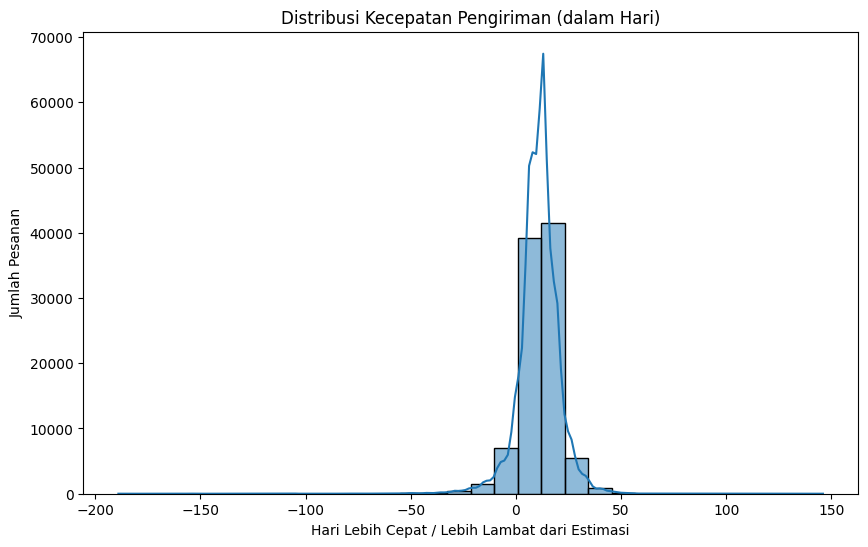

In [16]:
# Visualisasi distribusi perbedaan waktu pengiriman
plt.figure(figsize=(10, 6))
sns.histplot(orders_data['delivery_difference'], bins=30, kde=True)
plt.title('Distribusi Kecepatan Pengiriman (dalam Hari)')
plt.xlabel('Hari Lebih Cepat / Lebih Lambat dari Estimasi')
plt.ylabel('Jumlah Pesanan')
plt.show()

Dari grafik diatas, diperoleh insight dan penjelasan sebagai berikut:

Grafik diatas menggambarkan distribusi kecepatan pengiriman produk pesanan pe;anggan. Sumbu X menunjukkan selisih waktu antara waktu pengiriman aktual dengan estimasi waktu pengiriman. Nilai negatif berarti pengiriman lebih cepat dari estimasi, sedangkan nilai positif berarti pengiriman lebih lambat dari estimasi. Sumbu Y menunjukkan jumlah pesanan yang mengalami selisih waktu tersebut.

**Interpretasi:**

* **Sebagian besar pengiriman tepat waktu atau sedikit lebih cepat:** Puncak tertinggi pada grafik berada di sekitar nilai 0, yang menandakan banyak pesanan yang dikirim tepat waktu sesuai estimasi. Ada juga lonjakan kecil di sisi kiri 0, yang menunjukkan banyak pesanan yang dikirim lebih cepat dari estimasi.
* **Ada beberapa pengiriman yang terlambat:** Terdapat ekor panjang pada sisi kanan grafik, yang menunjukkan adanya beberapa pesanan yang mengalami keterlambatan pengiriman, bahkan hingga lebih dari 100 hari.
* **Distribusi tidak simetris**: Bentuk grafik tidak simetris, dengan ekor yang lebih panjang di sisi kanan. Ini menunjukkan bahwa ada lebih banyak variasi dalam keterlambatan pengiriman dibandingkan dengan pengiriman yang lebih cepat.

**Kesimpulan:**

Secara keseluruhan, grafik ini menunjukkan bahwa sebagian besar pengiriman dilakukan **sesuai estimasi atau bahkan lebih cepat**. Namun, masih ada sejumlah pesanan yang mengalami keterlambatan pengiriman, terutama pada beberapa kasus yang ekstrim.

In [17]:
# Statistik Deskriptif
delivery_stats = orders_data['delivery_difference'].describe()
print("Statistik Deskriptif untuk Perbedaan Pengiriman:\n", delivery_stats)

Statistik Deskriptif untuk Perbedaan Pengiriman:
 count    96475.000000
mean        10.877067
std         10.183744
min       -189.000000
25%          6.000000
50%         11.000000
75%         16.000000
max        146.000000
Name: delivery_difference, dtype: float64


**Insight:**
Output deskriptif untuk perbedaan pengiriman (`delivery_difference`) memberikan ringkasan mengenai kecepatan pesanan tiba dibandingkan dengan estimasi waktu pengiriman:

* **Count**: Ada **96.475** pesanan yang dianalisis.
* **Mean**: Rata-rata pengiriman lebih cepat sekitar **10.88** hari dari estimasi.
* **Std**: Penyimpangan standar sebesar **10.18** hari, menunjukkan variasi signifikan dalam perbedaan waktu pengiriman.
* **Min**: Nilai terendah **-189** menunjukkan bahwa beberapa pengiriman **terlambat** hingga **189 hari** dari estimasi.
* **25%** (**Q1**): Seperempat pesanan tiba setidaknya **6 hari** lebih cepat.
* **50%** (**Median**): Setengah dari pesanan tiba sekitar **11 hari** lebih cepat.
* **75%** (**Q3**): Tiga perempat pesanan tiba sekitar **16 hari** lebih cepat.
* **Max**: Nilai tertinggi adalah **146 hari** lebih cepat dari estimasi.

Secara keseluruhan, pesanan cenderung tiba **lebih cepat dari estimasi**, dengan beberapa kasus ekstrim terlambat.

### **4. Pertanyaan 4:** *Apakah terdapat pelanggan loyal dengan pola pembelian yang konsisten, dan faktor apa yang membuat mereka tetap membeli di platform ini?*

In [23]:
# Menghitung jumlah pesanan per pelanggan
order_counts = orders_data.groupby('customer_id')['order_id'].nunique().reset_index()
order_counts.columns = ['customer_id', 'order_count']

# Menentukan pelanggan loyal (misalnya, pelanggan dengan lebih dari 2 pesanan)
loyal_customers = order_counts[order_counts['order_count'] > 2]

# Menggabungkan dengan data pelanggan untuk mendapatkan informasi tambahan
loyal_customers_data = loyal_customers.merge(customers_data, on='customer_id', how='left')

In [24]:
# Menampilkan statistik deskriptif untuk jumlah pesanan per pelanggan
print("Statistik Deskriptif untuk Jumlah Pesanan Per Pelanggan:")
print(order_counts['order_count'].describe())

Statistik Deskriptif untuk Jumlah Pesanan Per Pelanggan:
count    96475.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: order_count, dtype: float64


In [25]:
# Menampilkan jumlah pelanggan loyal
print("\nJumlah Pelanggan Loyal:", len(loyal_customers))


Jumlah Pelanggan Loyal: 0


In [26]:
# Menampilkan beberapa data pelanggan loyal
print("\nContoh Data Pelanggan Loyal:")
print(loyal_customers_data.head())


Contoh Data Pelanggan Loyal:
Empty DataFrame
Columns: [customer_id, order_count, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []


## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Pertanyaan 2:

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2